### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Network stuff

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:xlabel='Date'>

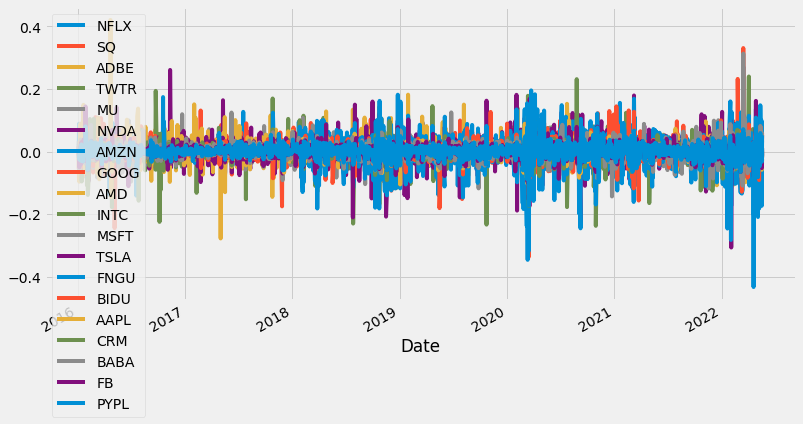

In [2]:
USE_LOG_RETURN = True

# ls = ['HMMJ,'ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to', ,'PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted
ls = ['AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR','FNGU', 'MSFT'] # FNGU ETF
ls.extend(['ADBE', 'AMD', 'AMZN', 'CRM', 'INTC', 'MSFT', 'MU', 'NFLX', 'PYPL', 'SQ']) # BULZ ETF
ls  = list(set(ls))

data = {} 

for i in ls:
  arry= yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])), index=arry.index[1:])
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [3]:
# np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

(1606, 19)

(1089, 19)

,NFLX,SQ,ADBE,TWTR,MU,NVDA,AMZN,GOOG,AMD,INTC,MSFT,TSLA,FNGU,BIDU,AAPL,CRM,BABA,FB,PYPL
Date,,,,,,,,,,,,,,,,,,,
2018-01-24,0.043049,-0.015449,-0.011612,-0.016844,-0.019994,-0.013103,-0.003698,-0.004910,-0.017934,-0.012013,-0.000871,-0.019752,-0.002056,0.002367,-0.016057,-0.003450,0.016761,-0.014898,-0.005955
2018-01-25,0.031641,0.017890,-0.001366,-0.009432,-0.001626,0.002330,0.014945,0.005251,-0.023887,-0.004625,0.005539,-0.024141,-0.000749,-0.014919,-0.018012,-0.007918,0.014219,0.004973,0.007498
2018-01-26,0.018005,0.018663,0.019007,0.090952,0.015229,0.029105,0.017339,0.004663,0.042593,0.100315,0.018564,0.015313,0.079351,0.023757,0.002335,0.015422,0.034150,0.013352,0.013075
2018-01-29,0.035734,-0.011816,-0.015368,0.036809,-0.008740,0.014362,0.011086,-0.000221,0.028171,-0.001999,-0.001489,0.019296,0.016980,-0.025372,-0.020916,-0.003524,-0.010827,-0.021385,-0.013431
2018-01-30,-0.020555,0.001979,-0.006732,0.017323,-0.038140,-0.016873,0.014106,-0.010166,-0.034368,-0.024098,-0.012644,-0.010671,-0.028462,-0.038816,-0.005912,-0.009489,-0.016639,0.006111,-0.006306


In [4]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round(roi*100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:xlabel='Date'>

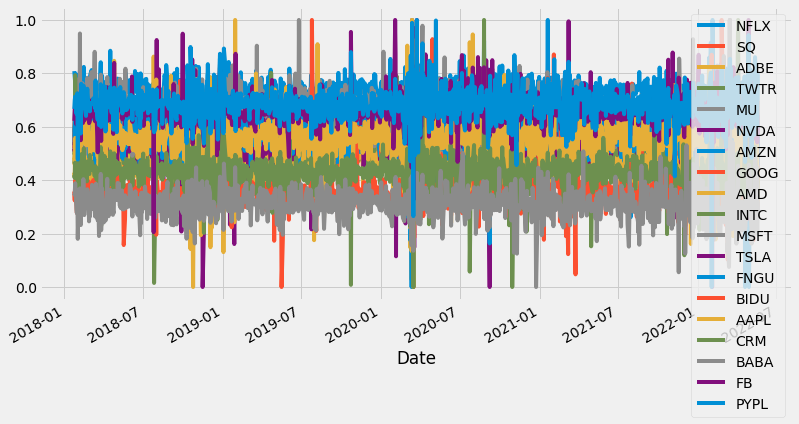

In [5]:
def scale_data(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = scale_data(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [6]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,NFLX,SQ,ADBE,TWTR,MU,NVDA,AMZN,GOOG,AMD,INTC,MSFT,TSLA,FNGU,BIDU,AAPL,CRM,BABA,FB,PYPL
NFLX,1.000000,0.513558,0.604149,0.404766,0.390532,0.535733,0.622585,0.517337,0.466396,0.435691,0.561017,0.383415,0.689531,0.417909,0.508227,0.554477,0.421010,0.534411,0.539287
SQ,1.513558,1.513558,1.237785,0.932376,0.853887,1.141634,1.200165,1.036596,0.996721,0.852165,1.130623,0.811164,1.367042,0.905253,1.019609,1.174568,0.876974,1.037359,1.230745
ADBE,2.117707,2.147193,2.237785,1.423258,1.334420,1.811475,1.877463,1.716304,1.561338,1.370487,1.920593,1.250403,2.102612,1.374176,1.649971,1.933013,1.324646,1.663440,1.935070
TWTR,2.522473,2.674803,2.728667,2.423258,1.747179,2.277565,2.336671,2.210781,1.963719,1.763450,2.387786,1.583673,2.762378,1.818244,2.088886,2.402925,1.762509,2.217981,2.452806
MU,2.913005,3.138158,3.209199,2.836017,2.747179,2.906460,2.813954,2.726075,2.507548,2.417868,2.904931,1.928216,3.342369,2.246263,2.585687,2.841270,2.177673,2.670604,2.901868
NVDA,3.448738,3.744059,3.879040,3.302107,3.376074,3.906460,3.438245,3.341224,3.221590,3.041937,3.568803,2.382094,4.109668,2.702181,3.209032,3.446372,2.635897,3.229596,3.517214
AMZN,4.071323,4.321639,4.556339,3.761315,3.853357,4.530751,4.438245,4.028260,3.763513,3.534861,4.263916,2.790901,4.867284,3.157984,3.856279,4.064434,3.113816,3.854449,4.142772
GOOG,4.588660,4.840897,5.236047,4.255792,4.368652,5.145900,5.125281,5.028260,4.266733,4.087873,5.014685,3.169038,5.610691,3.631287,4.515949,4.678760,3.581087,4.566222,4.756326
AMD,5.055056,5.371222,5.800664,4.658173,4.912482,5.859942,5.667204,5.531481,5.266733,4.583020,5.567537,3.581368,6.242743,4.014326,5.026740,5.194776,3.959179,5.048662,5.275944
INTC,5.490747,5.787696,6.318986,5.051136,5.566899,6.484011,6.160128,6.084493,5.761880,5.583020,6.141372,3.981930,6.849214,4.428018,5.587688,5.657525,4.372085,5.511738,5.784925


In [7]:
corrwith = stocks_norm.corr()
corr_cumSum = corrwith.cumsum()
corr_cumSum

,NFLX,SQ,ADBE,TWTR,MU,NVDA,AMZN,GOOG,AMD,INTC,MSFT,TSLA,FNGU,BIDU,AAPL,CRM,BABA,FB,PYPL
NFLX,1.000000,0.507590,0.565285,0.344645,0.359314,0.492394,0.594369,0.497085,0.420529,0.363907,0.515402,0.353734,0.669920,0.353378,0.455224,0.531524,0.393972,0.500547,0.506208
SQ,1.507590,1.507590,1.212200,0.828423,0.870735,1.133250,1.185890,1.051208,0.938141,0.815256,1.133179,0.811769,1.382729,0.830090,1.009414,1.154626,0.863887,1.029185,1.207552
ADBE,2.072875,2.154504,2.212200,1.297046,1.399931,1.826677,1.868508,1.768735,1.496980,1.367555,1.958455,1.274651,2.148169,1.256979,1.695289,1.924297,1.304507,1.645387,1.874730
TWTR,2.417520,2.638282,2.680823,2.297046,1.794203,2.257915,2.281994,2.239805,1.822155,1.755263,2.422880,1.578906,2.772599,1.615881,2.131964,2.356419,1.672171,2.119504,2.319510
MU,2.776834,3.149703,3.210020,2.691318,2.794203,2.903924,2.760557,2.788849,2.360748,2.385417,3.008836,1.941641,3.387877,2.033609,2.676114,2.832702,2.085269,2.575306,2.789545
NVDA,3.269228,3.790558,3.903447,3.122556,3.440213,3.903924,3.398053,3.442843,3.059071,2.973763,3.724021,2.401299,4.168640,2.452029,3.333492,3.454459,2.528158,3.140850,3.389332
AMZN,3.863597,4.382080,4.586065,3.536043,3.918776,4.541420,4.398053,4.110725,3.602100,3.445934,4.432486,2.814349,4.939347,2.842815,3.978056,4.083083,2.961118,3.751604,3.975685
GOOG,4.360682,4.936202,5.303592,4.007113,4.467820,5.195413,5.065935,5.110725,4.120151,4.005947,5.225960,3.213762,5.711469,3.265017,4.665748,4.726851,3.395268,4.418739,4.551071
AMD,4.781211,5.453814,5.862430,4.332289,5.006413,5.893736,5.608965,5.628776,5.120151,4.441758,5.792539,3.614291,6.339934,3.621581,5.209463,5.234950,3.755348,4.851235,5.016684
INTC,5.145118,5.905163,6.414729,4.719997,5.636568,6.482081,6.081136,6.188789,5.555962,5.441758,6.418819,3.984030,6.925747,3.976106,5.782258,5.703864,4.126409,5.298141,5.501783


In [8]:
stocks_norm_spearmanr_cumSum.sort_values("MSFT", inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 3
top_N = stocks.columns.shape[0]# // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]

keepThese = keepThese.columns
if "FNGU" not in keepThese:
#   keepThese.append("FNGU")
    keepThese.append(pd.Index(["FNGU"]))
keepThese = keepThese.to_numpy()

# corr = stocks_norm_spearmanr[keepThese].round(2) # all rows. wont work well with code below (networkx)
corr = stocks_norm_spearmanr.loc[keepThese, keepThese].round(2) # only row the index rows
corr = corr - np.eye(len(corr))
corr

,TSLA,BABA,BIDU,TWTR,NFLX,MU,FB,INTC,AAPL,AMD,SQ,CRM,PYPL,GOOG,AMZN,ADBE,MSFT,NVDA,FNGU
TSLA,0.00,0.33,0.36,0.33,0.38,0.34,0.36,0.40,0.42,0.41,0.43,0.41,0.39,0.38,0.41,0.44,0.42,0.45,0.65
BABA,0.33,0.00,0.68,0.44,0.42,0.42,0.46,0.41,0.45,0.38,0.46,0.43,0.47,0.47,0.48,0.45,0.47,0.46,0.68
BIDU,0.36,0.68,0.00,0.44,0.42,0.43,0.43,0.41,0.45,0.38,0.49,0.46,0.46,0.47,0.46,0.47,0.46,0.46,0.69
TWTR,0.33,0.44,0.44,0.00,0.40,0.41,0.55,0.39,0.44,0.40,0.53,0.47,0.52,0.49,0.46,0.49,0.47,0.47,0.66
NFLX,0.38,0.42,0.42,0.40,0.00,0.39,0.53,0.44,0.51,0.47,0.51,0.55,0.54,0.52,0.62,0.60,0.56,0.54,0.69
MU,0.34,0.42,0.43,0.41,0.39,0.00,0.45,0.65,0.50,0.54,0.46,0.44,0.45,0.52,0.48,0.48,0.52,0.63,0.58
FB,0.36,0.46,0.43,0.55,0.53,0.45,0.00,0.46,0.58,0.48,0.50,0.55,0.61,0.71,0.62,0.63,0.62,0.56,0.73
INTC,0.40,0.41,0.41,0.39,0.44,0.65,0.46,0.00,0.56,0.50,0.42,0.46,0.51,0.55,0.49,0.52,0.57,0.62,0.61
AAPL,0.42,0.45,0.45,0.44,0.51,0.50,0.58,0.56,0.00,0.51,0.51,0.57,0.59,0.66,0.65,0.63,0.71,0.62,0.73
AMD,0.41,0.38,0.38,0.40,0.47,0.54,0.48,0.50,0.51,0.00,0.53,0.52,0.52,0.50,0.54,0.56,0.55,0.71,0.63


In [9]:
# corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

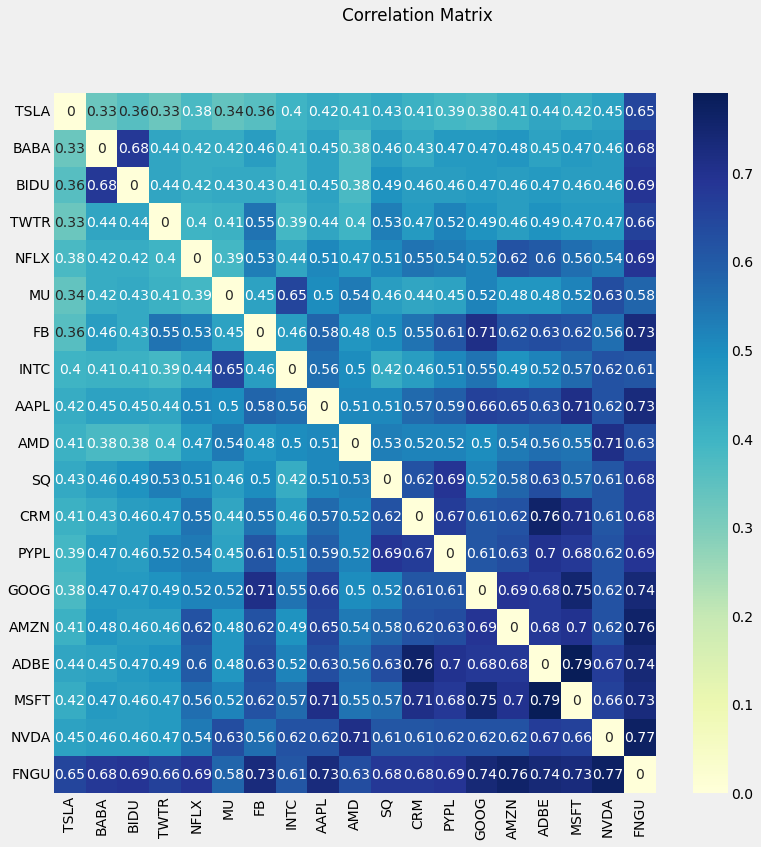

In [10]:
_=plt.subplots(figsize=(12, 12))
_=plt.suptitle("Correlation Matrix")
_=sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [11]:
# for (u,v,d) in G.edges(data=True):
#     d['weight']

In [12]:
numb_edges = 10

# pos_corr_mat = np.where(corr_mat >= avg, corr_mat, 0)
all = corr.values.flatten()
all = all[all.nonzero()]
all = np.sort(all)[::-1]
# thresh = np.average(all) + 2*np.std(all)
thresh = all[numb_edges]


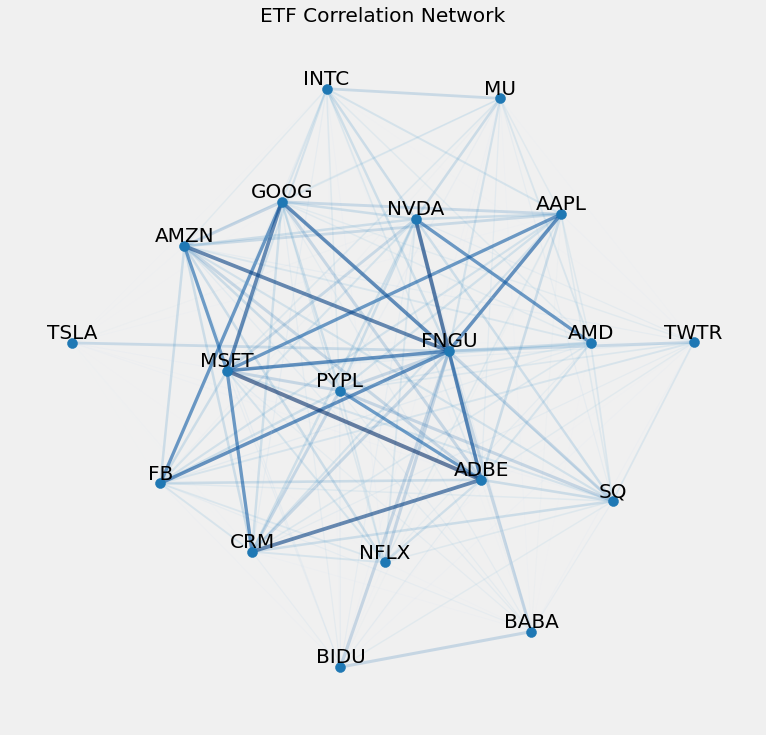

In [13]:
_=plt.figure(figsize=(12, 12))
_=plt.title("ETF Correlation Network")

G=nx.Graph()
# G=graph

for i in range(len(corr)):
  for j in range(len(corr)):
    if i!=j: # doesnt work.... 
      if np.abs(corr.iloc[i,j]) > 0.25:
        G.add_edge(keepThese[i], keepThese[j], weight=corr.iloc[i,j])

# for i in G.nodes():
#     G.remove_edge(i, i)



pos=nx.spring_layout(G) # positions for all nodes

# nodes
_=nx.draw_networkx_nodes(G,pos, node_size=100)


# Two types of egdes
# elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= thresh]
# esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < thresh]
# _=nx.draw_networkx_edges(G,pos,edgelist=esmall,
#                     width=1.5,alpha=0.25,edge_color='r') # ,style='dashed'
# _=nx.draw_networkx_edges(G,pos,edgelist=elarge,
#                     width=3,alpha=1,edge_color='g')
# ###############################################################################

# continuous width & alpha of edges 
weights = np.array([G[u][v]['weight'] for u,v in G.edges()])
weights_scaled = scale_data(weights)
width = np.array(weights_scaled) * 4

weights_shewed = np.log(weights_scaled+1, where=weights_scaled != 0) # force a right shew
alpha = scale_data(weights_shewed)
alpha = np.where(alpha < .35, .1, alpha)
alpha = np.where((alpha > .35) & (alpha < .85), .2, alpha)
alpha = np.where(alpha > .85, .6, alpha)
# alpha

_=nx.draw_networkx_edges(G,pos, alpha=alpha, width=width,
  edge_color=weights_scaled, edge_cmap=plt.cm.Blues)
# ###############################################################################

# labels
_=nx.draw_networkx_labels(G,pos, font_size=20, verticalalignment='bottom')

_=plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [14]:
corr_mat = np.matrix(corr, dtype=None)

graph = nx.from_numpy_matrix(corr_mat)
mapping = lambda i: keepThese[i]

graph = nx.relabel_nodes(graph, mapping)

Text(0.5, 1.0, 'ETF Correlation Network')

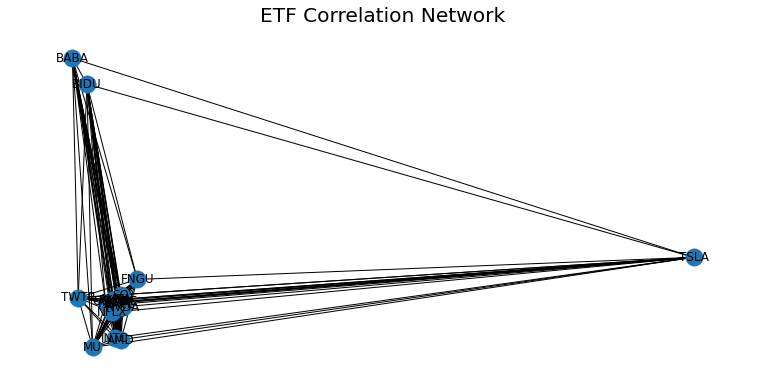

In [15]:
plt.title("ETF Correlation Network")
nx.draw_spectral(graph, with_labels=True)
# # nx.draw_shell(graph, with_labels=True, cmap=plt.get_cmap('jet'), node_size=500) # node_color='blue'

# # corr.cumsum() # shows which are the most correlated with each other. This is illustated in `nx.draw_spectral(graph, with_labels=True)`

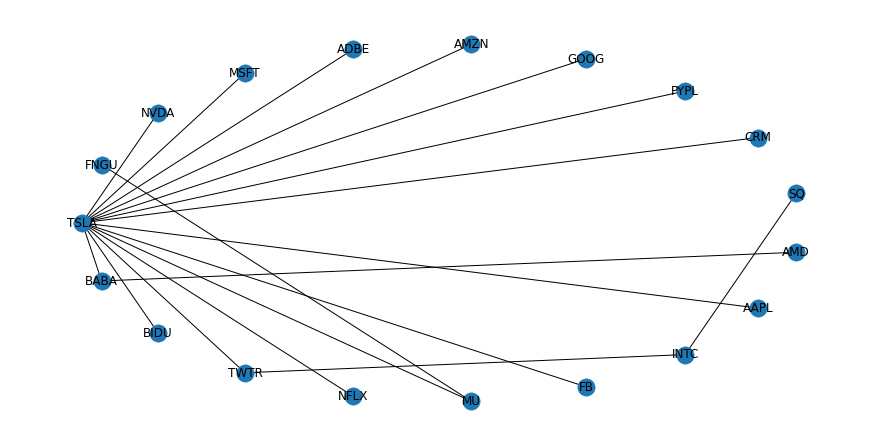

In [16]:
# # spanning tree 
span = nx.minimum_spanning_tree(graph)
nx.draw_shell(span, with_labels=True)